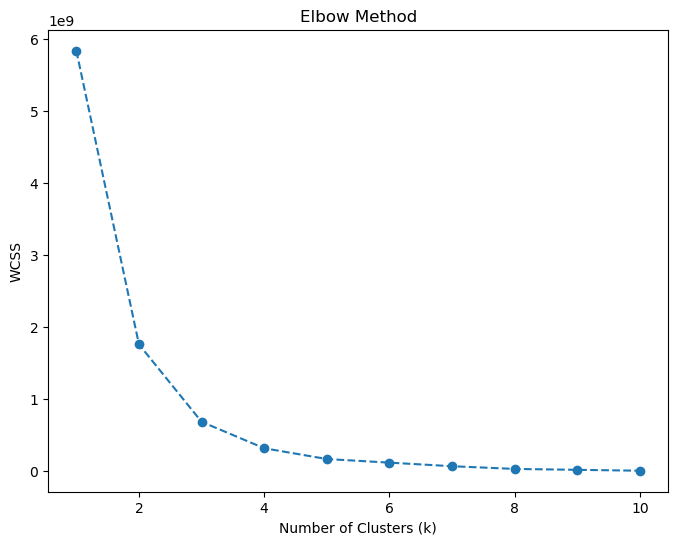

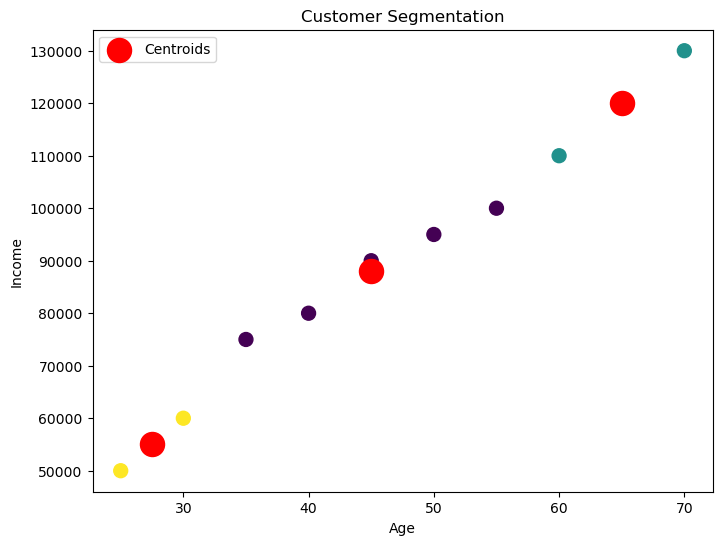

          Age              Income               Customer_ID
         mean       std      mean           std       count
Cluster                                                    
0        45.0  7.905694   88000.0  10368.220677           5
1        65.0  5.000000  120000.0  10000.000000           3
2        27.5  3.535534   55000.0   7071.067812           2


In [2]:
 
# For the purpose of this example, let's create a sample customer dataset.
import pandas as pd

data = {
    'Customer_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'Income': [50000, 60000, 75000, 80000, 90000, 95000, 100000, 110000, 120000, 130000]
}

df = pd.DataFrame(data)

# Step 2: Data Preprocessing
# No preprocessing is required in this simplified example.

# Step 3: Feature Selection
# We will use 'Age' and 'Income' for segmentation.
X = df[['Age', 'Income']]

# Step 4: Choosing the Number of Clusters (k)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the elbow method to determine the optimal number of clusters (k).
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph to find the optimal k.
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow method, let's choose k=3 for this example.

# Step 5: Applying K-Means
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

# Step 6: Cluster Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X['Age'], X['Income'], c=kmeans.labels_, s=100, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

# Step 7: Interpretation
# Analyze the characteristics of each cluster.

df['Cluster'] = kmeans.labels_
cluster_summary = df.groupby('Cluster').agg({'Age': ['mean', 'std'], 'Income': ['mean', 'std'], 'Customer_ID': 'count'})
print(cluster_summary)




### n this code, we create a simple customer dataset with 'Age' and 'Income' columns and perform customer segmentation using K-Means clustering with k=3 clusters. We visualize the clusters, calculate cluster statistics, and discuss strategies based on the cluster characteristics. However, for a real-world project, you would need to further analyze and refine your strategies and perform evaluations to determine their effectiveness.